In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

## Topics/Questions

### 1) NYC market growth from the past till today
#### Time-series (May 2020 vs Apr 2021) (by total) - check if monthly?
- No. of host (count host_id)
- No. of listings (count id)
- Average/Median price (price)

#### By neighborhood (Apr 2021)
- No. of host
- No. of listings
- Average/Median price
- Reviews
    - Total
    - By features
    - Correlation/Regression between each
- property_type, room_type


### 2) How’s the future looking? (compare btw 2 years? to check covid effect)
- availability_365
- what factors make them more popular (group by 1.less 2.moderate 3.high) e.g. price, reviews, location

### 3) Understanding price, ratings, availability
#### What factors influence price? - regression?
- Breakdown
    - Neighborhood
    - host_is_superhost, host_total_listings_count
    - property_type, room_type, accommodates (no. of rooms)
    - 'review_scores_rating', 'review_scores_accuracy',  'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'

#### What factors influence availability_365?
#### What factors influence review_scores_rating?

In [9]:
listings = pd.read_csv('listings.csv')

In [139]:
listings3.corr()

,id,accommodates,bedrooms,beds,availability_365,review_scores_rating,number_of_reviews,host_id,host_total_listings_count,latitude,longitude
id,1.000000,0.033098,0.054662,0.026972,0.180570,-0.060240,-0.307393,0.596530,0.125218,0.010094,0.097242
accommodates,0.033098,1.000000,0.738055,0.721760,0.102500,-0.012833,0.072492,0.026084,-0.010698,-0.037869,-0.007259
bedrooms,0.054662,0.738055,1.000000,0.734148,0.083506,0.006932,-0.002900,0.028628,-0.015552,-0.065335,-0.001707
beds,0.026972,0.721760,0.734148,1.000000,0.095659,-0.012912,0.065529,0.038798,-0.029107,-0.044412,0.018065
availability_365,0.180570,0.102500,0.083506,0.095659,1.000000,-0.070645,0.134464,0.232397,0.114102,0.025681,0.083632
review_scores_rating,-0.060240,-0.012833,0.006932,-0.012912,-0.070645,1.000000,0.059993,-0.144820,-0.029127,-0.026995,-0.020676
number_of_reviews,-0.307393,0.072492,-0.002900,0.065529,0.134464,0.059993,1.000000,-0.135998,-0.065584,-0.041456,0.064387
host_id,0.596530,0.026084,0.028628,0.038798,0.232397,-0.144820,-0.135998,1.000000,0.079971,0.029672,0.119687
host_total_listings_count,0.125218,-0.010698,-0.015552,-0.029107,0.114102,-0.029127,-0.065584,0.079971,1.000000,0.038182,-0.080822
latitude,0.010094,-0.037869,-0.065335,-0.044412,0.025681,-0.026995,-0.041456,0.029672,0.038182,1.000000,0.074550


In [10]:
listings

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210407173759,2021-04-09,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,10.0,10.0,9.0,NaN,f,3,3,0,0,0.35
1,3831,https://www.airbnb.com/rooms/3831,20210407173759,2021-04-12,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,10.0,10.0,10.0,NaN,f,1,1,0,0,4.98
2,5121,https://www.airbnb.com/rooms/5121,20210407173759,2021-04-09,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.35
3,5136,https://www.airbnb.com/rooms/5136,20210407173759,2021-04-10,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/a3f7ace8-e7a9...,7378,https://www.airbnb.com/users/show/7378,...,10.0,8.0,10.0,NaN,f,1,1,0,0,0.01
4,5178,https://www.airbnb.com/rooms/5178,20210407173759,2021-04-12,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,9.0,10.0,9.0,NaN,f,1,0,1,0,3.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36900,49088566,https://www.airbnb.com/rooms/49088566,20210407173759,2021-04-10,Amenity-loaded Single Room in UWS,SharedEasy is the only community-oriented Coli...,Morningside Heights is bursting at the seams w...,https://a0.muscache.com/pictures/9eeedafc-e693...,334376746,https://www.airbnb.com/users/show/334376746,...,NaN,NaN,NaN,NaN,t,3,0,3,0,NaN
36901,49089512,https://www.airbnb.com/rooms/49089512,20210407173759,2021-04-09,Unfurnished 2BR Apartment in Upper East Side,2 bedroom apartment in Upper East Side.<br /><...,NaN,https://a0.muscache.com/pictures/f80f622a-3194...,305240193,https://www.airbnb.com/users/show/305240193,...,NaN,NaN,NaN,NaN,f,241,42,199,0,NaN
36902,49089765,https://www.airbnb.com/rooms/49089765,20210407173759,2021-04-09,Beautiful Renovated Sunny Jr. One Bed,Beautifully recently renovated and furnished J...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,387269117,https://www.airbnb.com/users/show/387269117,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
36903,49091581,https://www.airbnb.com/rooms/49091581,20210407173759,2021-04-09,Furnished Bright Apartment in Hell's Kitchen,1 bedroom apartment in Hell's Kitchen.<br />Mo...,NaN,https://a0.muscache.com/pictures/8f730543-a68b...,305240193,https://www.airbnb.com/users/show/305240193,...,NaN,NaN,NaN,NaN,f,241,42,199,0,NaN


In [11]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [124]:
listings.describe(include='object').T

,count,unique,top,freq
listing_url,36905,36905,https://www.airbnb.com/rooms/31878988,1
last_scraped,36905,6,2021-04-09,11742
name,36892,35651,Well-kept apartment home | 1BR in New York,41
description,35637,33507,Stay for 31+ nights (minimum nights and rates ...,55
neighborhood_overview,23087,18986,The Greenpoint House in only a few short block...,59
picture_url,36905,35930,https://a0.muscache.com/pictures/6998e77e-4564...,37
host_url,36905,26252,https://www.airbnb.com/users/show/107434423,266
host_name,35637,8807,Michael,293
host_since,35637,4035,2016-12-16,278
host_location,35549,1393,"New York, New York, United States",22099


In [40]:
listings2 = listings.drop(columns = ['listing_url','scrape_id','last_scraped','picture_url','host_url',
                                     'license','host_thumbnail_url','host_picture_url','calendar_last_scraped',
                                     'description','neighborhood_overview','host_about','name','host_name',
                                     'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
                                     'maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                                     'calendar_updated', 'has_availability'])

In [41]:
listings2

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,2845,2008-09-09,"New York, New York, United States",within a few hours,87%,24%,f,Midtown,6.0,...,10.0,10.0,10.0,9.0,f,3,3,0,0,0.35
1,3831,4869,2008-12-07,"New York, New York, United States",within an hour,83%,94%,f,Clinton Hill,1.0,...,9.0,10.0,10.0,10.0,f,1,1,0,0,4.98
2,5121,7356,2009-02-03,"New York, New York, United States",NaN,NaN,NaN,f,Bedford-Stuyvesant,1.0,...,10.0,10.0,9.0,9.0,f,1,0,1,0,0.35
3,5136,7378,2009-02-03,"New York, New York, United States",within a few hours,100%,NaN,f,Greenwood Heights,1.0,...,10.0,10.0,8.0,10.0,f,1,1,0,0,0.01
4,5178,8967,2009-03-03,"New York, New York, United States",within a day,100%,100%,f,Hell's Kitchen,1.0,...,9.0,9.0,10.0,9.0,f,1,0,1,0,3.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36900,49088566,334376746,2020-02-07,US,within an hour,100%,100%,f,NaN,3.0,...,NaN,NaN,NaN,NaN,t,3,0,3,0,NaN
36901,49089512,305240193,2019-10-29,"New York, New York, United States",within a few hours,99%,46%,f,Crown Heights,1.0,...,NaN,NaN,NaN,NaN,f,241,42,199,0,NaN
36902,49089765,387269117,2021-02-04,US,within an hour,100%,100%,f,NaN,0.0,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
36903,49091581,305240193,2019-10-29,"New York, New York, United States",within a few hours,99%,46%,f,Crown Heights,1.0,...,NaN,NaN,NaN,NaN,f,241,42,199,0,NaN


In [7]:
listings_sum = pd.read_csv('listings_sum.csv')

In [8]:
listings_sum

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,48,2019-11-04,0.35,3,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.68494,-73.95765,Entire home/apt,76,1,396,2021-03-19,4.98,1,198
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.35,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,175,7,1,2014-01-02,0.01,1,79
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,79,2,474,2020-09-25,3.26,1,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36900,49088566,Amenity-loaded Single Room in UWS,334376746,Sharedeasy,Manhattan,Upper West Side,40.79949,-73.96118,Private room,46,30,0,NaN,NaN,3,365
36901,49089512,Unfurnished 2BR Apartment in Upper East Side,305240193,June,Manhattan,Upper East Side,40.78041,-73.94575,Entire home/apt,98,30,0,NaN,NaN,241,364
36902,49089765,Beautiful Renovated Sunny Jr. One Bed,387269117,Tal,Manhattan,East Village,40.72511,-73.98222,Entire home/apt,145,30,0,NaN,NaN,3,300
36903,49091581,Furnished Bright Apartment in Hell's Kitchen,305240193,June,Manhattan,Hell's Kitchen,40.76456,-73.98573,Entire home/apt,123,30,0,NaN,NaN,241,312


In [12]:
listings_sum.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [59]:
#by neighbourhood
listings2.groupby('neighbourhood_cleansed').mean()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
neighbourhood_cleansed,,,,,,,,,,,,,,,,,,,,,
Allerton,3.118710e+07,1.529949e+08,2.642857,2.642857,40.864027,-73.858778,4.060606,NaN,1.419355,2.212121,...,9.482759,9.724138,9.793103,9.482759,9.379310,2.939394,1.393939,1.545455,0.000000,1.825517
Arden Heights,3.367265e+07,2.609983e+08,1.333333,1.333333,40.551863,-74.179370,6.000000,NaN,2.000000,3.666667,...,9.333333,9.666667,9.666667,9.666667,9.000000,1.000000,1.000000,0.000000,0.000000,1.013333
Arrochar,2.679135e+07,1.033714e+08,6.250000,6.250000,40.593119,-74.073428,3.000000,NaN,1.416667,1.875000,...,9.687500,9.875000,9.875000,9.687500,9.500000,2.875000,1.750000,1.125000,0.000000,1.538125
Arverne,2.824053e+07,1.036412e+08,1.840580,1.840580,40.591886,-73.794637,4.507042,NaN,1.925373,2.614286,...,9.721311,9.836066,9.803279,9.622951,9.524590,1.563380,1.056338,0.507042,0.000000,1.170492
Astoria,2.471993e+07,9.700139e+07,8.484227,8.484227,40.764197,-73.920110,2.322188,NaN,1.149920,1.367442,...,9.420833,9.740586,9.759414,9.721757,9.492662,8.598784,1.360182,7.193009,0.044073,0.898884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Willowbrook,2.708802e+07,1.158272e+08,2.000000,2.000000,40.599190,-74.133890,8.000000,NaN,4.000000,6.000000,...,10.000000,10.000000,10.000000,9.000000,9.000000,2.000000,2.000000,0.000000,0.000000,0.580000
Windsor Terrace,1.886126e+07,4.565307e+07,1.655556,1.655556,40.654947,-73.978463,3.208333,NaN,1.577778,1.831579,...,9.582278,9.936709,9.835443,9.784810,9.632911,1.541667,1.104167,0.437500,0.000000,0.835875
Woodhaven,3.134458e+07,1.302321e+08,3.380282,3.380282,40.692559,-73.857996,2.534247,NaN,1.281690,1.583333,...,9.542373,9.966102,9.898305,9.508475,9.677966,3.301370,0.863014,2.383562,0.054795,1.327705


In [63]:
#by Borough
listings2.groupby('neighbourhood_group_cleansed').mean()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
neighbourhood_group_cleansed,,,,,,,,,,,,,,,,,,,,,
Bronx,3.078622e+07,1.407707e+08,11.554648,11.554648,40.849208,-73.883454,2.872000,NaN,1.316304,1.655704,...,9.411290,9.721774,9.727151,9.350806,9.448925,3.867000,2.248000,1.569000,0.049000,1.241768
Brooklyn,2.431116e+07,8.189065e+07,5.621188,5.621188,40.684017,-73.950580,2.824638,NaN,1.358872,1.561809,...,9.305858,9.769957,9.758643,9.535196,9.450518,4.263078,1.252450,2.930159,0.064251,0.824464
Manhattan,2.559170e+07,9.927741e+07,54.504420,54.504420,40.764054,-73.975318,2.783970,NaN,1.284676,1.489043,...,9.204961,9.661113,9.666786,9.688200,9.274682,16.719160,11.286302,5.148460,0.112373,0.756000
Queens,2.964153e+07,1.348998e+08,14.269206,14.269206,40.730815,-73.869665,2.674192,NaN,1.285338,1.559034,...,9.301941,9.696199,9.656000,9.533581,9.358021,14.458368,1.879246,12.468310,0.092792,1.157214
Staten Island,2.833647e+07,1.291593e+08,2.689655,2.689655,40.613826,-74.103048,3.279863,NaN,1.552239,1.968966,...,9.565574,9.831967,9.828571,9.579592,9.542857,2.460751,0.969283,1.467577,0.023891,1.254837


In [45]:
listings2.columns

Index(['id', 'host_id', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_v

In [90]:
listings3 = listings[['id','property_type', 'room_type', 'accommodates', 'bedrooms', 
                      'beds','neighbourhood','neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                      'availability_365','price','review_scores_rating','number_of_reviews','host_id',
                      'host_since','host_is_superhost','host_total_listings_count','host_response_time',
                      'latitude','longitude',]]

In [91]:
listings3

,id,property_type,room_type,accommodates,bedrooms,beds,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,availability_365,price,review_scores_rating,number_of_reviews,host_id,host_since,host_is_superhost,host_total_listings_count,host_response_time,latitude,longitude
0,2595,Entire apartment,Entire home/apt,2,NaN,1.0,"New York, United States",Midtown,Manhattan,365,$150.00,94.0,48,2845,2008-09-09,f,6.0,within a few hours,40.75356,-73.98559
1,3831,Entire guest suite,Entire home/apt,3,1.0,3.0,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,198,$76.00,89.0,396,4869,2008-12-07,f,1.0,within an hour,40.68494,-73.95765
2,5121,Private room in apartment,Private room,2,1.0,1.0,NaN,Bedford-Stuyvesant,Brooklyn,365,$60.00,90.0,50,7356,2009-02-03,f,1.0,NaN,40.68535,-73.95512
3,5136,Entire apartment,Entire home/apt,4,2.0,2.0,NaN,Sunset Park,Brooklyn,79,$175.00,97.0,1,7378,2009-02-03,f,1.0,within a few hours,40.66265,-73.99454
4,5178,Private room in apartment,Private room,2,1.0,1.0,"New York, United States",Midtown,Manhattan,355,$79.00,84.0,474,8967,2009-03-03,f,1.0,within a day,40.76457,-73.98317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36900,49088566,Private room in apartment,Private room,1,1.0,1.0,"New York, United States",Upper West Side,Manhattan,365,$46.00,NaN,0,334376746,2020-02-07,f,3.0,within an hour,40.79949,-73.96118
36901,49089512,Entire apartment,Entire home/apt,2,2.0,0.0,NaN,Upper East Side,Manhattan,364,$98.00,NaN,0,305240193,2019-10-29,f,1.0,within a few hours,40.78041,-73.94575
36902,49089765,Entire apartment,Entire home/apt,2,1.0,1.0,NaN,East Village,Manhattan,300,$145.00,NaN,0,387269117,2021-02-04,f,0.0,within an hour,40.72511,-73.98222
36903,49091581,Entire apartment,Entire home/apt,1,1.0,1.0,NaN,Hell's Kitchen,Manhattan,312,$123.00,NaN,0,305240193,2019-10-29,f,1.0,within a few hours,40.76456,-73.98573


In [85]:
listings3['neighbourhood'].value_counts().iloc[:10]

New York, United States                      9714
Brooklyn, New York, United States            8936
Queens, New York, United States              2580
Bronx, New York, United States                304
Brooklyn , New York, United States            296
The Bronx, New York, United States            272
Staten Island, New York, United States        193
Astoria, New York, United States               54
Long Island City, New York, United States      45
Flushing, New York, United States              36
Name: neighbourhood, dtype: int64

In [87]:
#by neighbourhood
listings3.groupby('neighbourhood').mean()

,id,accommodates,bedrooms,beds,review_scores_rating,number_of_reviews,host_id,host_total_listings_count,latitude,longitude
neighbourhood,,,,,,,,,,
"Astoria, New York, United States",29364445.0,1.0,1.0,1.0,98.00,10.0,220479551.0,1.0,40.756120,-73.916530
"Brooklyn, New York, United States",27927068.0,2.0,1.0,1.0,100.00,21.0,8171440.0,1.0,40.713100,-73.956940
"Bushwick,Brooklyn, New York, United States",4838271.0,2.0,1.0,1.0,96.00,5.0,1304390.0,1.0,40.698380,-73.929950
"Crown Heights,NY, New York, United States",14037145.0,3.0,1.0,1.0,88.00,27.0,83147028.0,2.0,40.670350,-73.926110
"East Elmhurst, New York, United States",42360275.0,10.0,3.0,10.0,97.00,44.0,295247374.0,NaN,40.761830,-73.868710
...,...,...,...,...,...,...,...,...,...,...
"woodside, New York, United States",40598720.0,1.0,1.0,1.0,NaN,0.0,115879887.0,1.0,40.747320,-73.904140
"ニュー・ヨーク, New York, United States",44125294.0,2.0,1.0,1.0,100.00,1.5,62211530.0,3.0,40.708200,-74.001080
"布鲁克林, New York, United States",38585315.0,3.0,1.0,2.0,73.00,9.0,294428595.0,NaN,40.643940,-74.006710


In [88]:
#by borough
listings3.groupby('neighbourhood_group_cleansed').mean()

,id,accommodates,bedrooms,beds,review_scores_rating,number_of_reviews,host_id,host_total_listings_count,latitude,longitude
neighbourhood_group_cleansed,,,,,,,,,,
Bronx,3.078622e+07,2.872000,1.316304,1.655704,94.094086,28.160000,1.407707e+08,11.554648,40.849208,-73.883454
Brooklyn,2.431116e+07,2.824638,1.358872,1.561809,94.357222,24.863009,8.189065e+07,5.621188,40.684017,-73.950580
Manhattan,2.559170e+07,2.783970,1.284676,1.489043,93.158479,18.635203,9.927741e+07,54.504420,40.764054,-73.975318
Queens,2.964153e+07,2.674192,1.285338,1.559034,93.221176,27.673364,1.348998e+08,14.269206,40.730815,-73.869665
Staten Island,2.833647e+07,3.279863,1.552239,1.968966,94.918367,37.242321,1.291593e+08,2.689655,40.613826,-74.103048


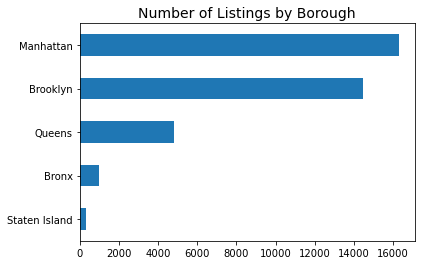

In [116]:
listings3['neighbourhood_group_cleansed'].value_counts().sort_values().plot.barh()
plt.title('Number of Listings by Borough', fontsize=14);

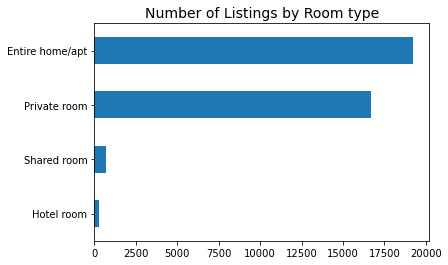

In [117]:
listings3['room_type'].value_counts(dropna=False).sort_values().plot.barh()
plt.title('Number of Listings by Room type', fontsize=14);

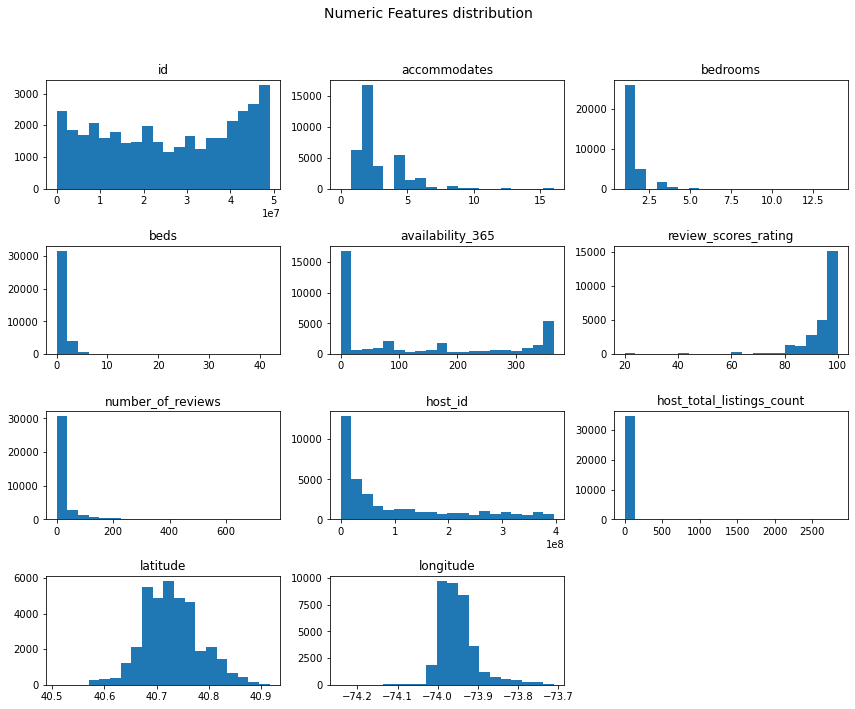

In [127]:
listings3.hist(figsize=(12, 10), bins=20, grid=False)
plt.suptitle('Numeric Features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

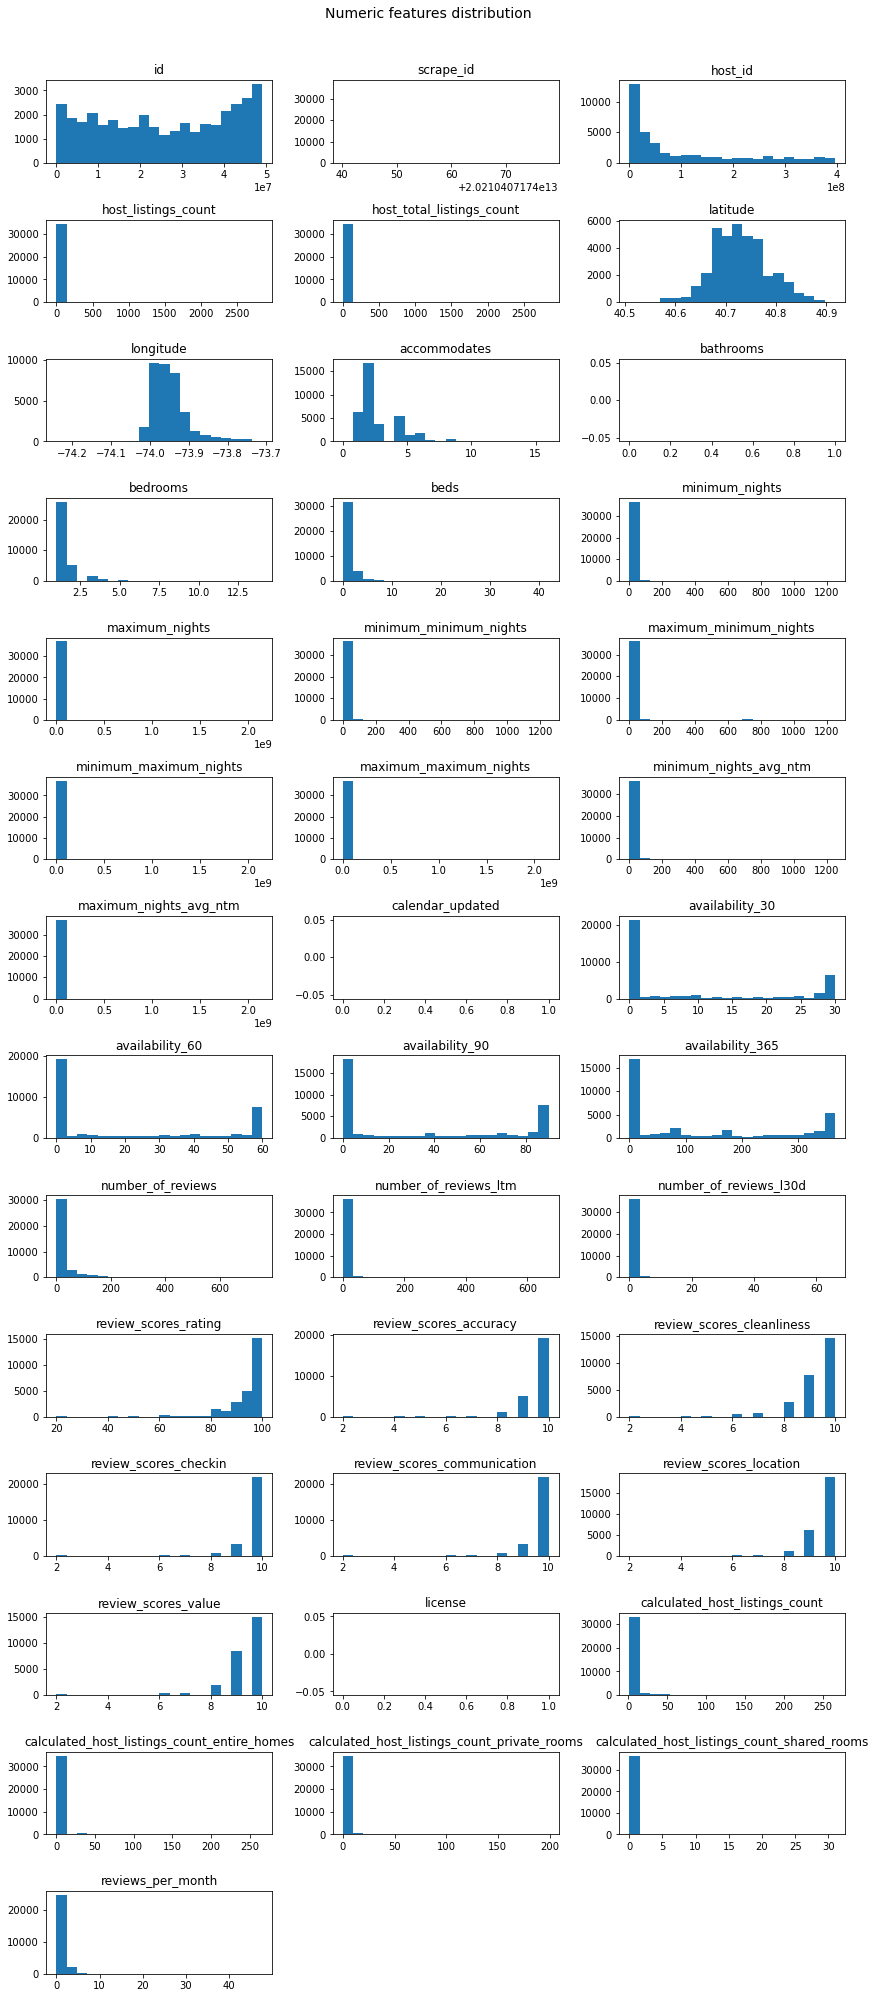

In [125]:
listings.hist(figsize=(12, 30), bins=20, grid=False, layout=(15, 3))
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])

In [134]:
listings3['price'].value_counts().iloc[:10]
#listings3['price'].plot.hist(bins=100)

$150.00    1298
$100.00    1236
$50.00     1088
$60.00      923
$80.00      890
$75.00      881
$70.00      812
$65.00      789
$120.00     752
$200.00     732
Name: price, dtype: int64

<AxesSubplot:>

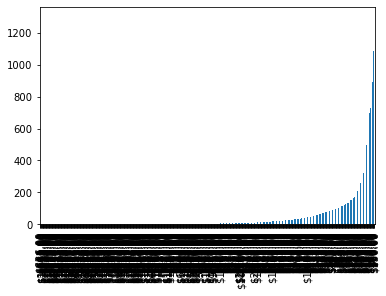

In [137]:
listings3['price'].value_counts(dropna=False).sort_values().plot.bar()

In [136]:
listings3["price"] = pd.to_numeric(listings3["price"])

ValueError: Unable to parse string "$150.00" at position 0